import pandas as pd
import numpy as np

In [1]:
#列データ
import pandas as pd
import numpy as np
names = ["UnitNum", "time", "ope1", "ope2", "ope3", "sensor1", "sensor2", "sensor3", "sensor4", "sensor5", "sensor6", "sensor7", "sensor8", "sensor9", "sensor10", "sensor11", "sensor12", "sensor13", "sensor14", "sensor15", "sensor16", "sensor17", "sensor18", "sensor19", "sensor20", "sensor21","dummy1", "dummy2"]
df = pd.read_csv("../PHM2008/train.txt", delimiter=" ",header=None,names=names,index_col=None)


In [2]:
df = df.drop(["dummy1","dummy2"], axis = "columns")
df.head(10)

,UnitNum,time,ope1,ope2,ope3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025
5,1,6,20.0032,0.7017,0.0,491.19,607.37,1480.46,1258.90,9.35,...,315.36,2388.05,8053.17,9.2276,0.02,364,2324,100.0,24.44,14.7019
6,1,7,41.9998,0.8400,40.0,445.00,549.57,1354.43,1131.44,3.91,...,130.16,2387.88,8082.01,9.3753,0.02,331,2212,100.0,10.53,6.4254
7,1,8,0.0011,0.0000,100.0,518.67,642.08,1589.55,1407.59,14.62,...,521.74,2388.03,8133.29,8.4339,0.03,391,2388,100.0,38.98,23.2337
8,1,9,0.0011,0.0020,100.0,518.67,642.70,1586.18,1399.01,14.62,...,521.72,2388.08,8132.72,8.3922,0.03,392,2388,100.0,38.99,23.2412
9,1,10,42.0066,0.8400,40.0,445.00,549.83,1353.19,1125.09,3.91,...,130.32,2387.91,8085.94,9.3667,0.02,330,2212,100.0,10.75,6.4268


In [3]:
df["UnitNum"] = df["UnitNum"].astype(np.str)

In [4]:
df.to_csv("../PHM2008/train.csv",index=None)

In [5]:
#218台
total_unit = df["UnitNum"].nunique()

In [6]:
#各ユニットの最大稼働時間
life = []
for x in range(total_unit):
    #各Unitに対して
    filtered = df[df["UnitNum"] ==str(x+1)]
    life.append(filtered["time"].max())

In [7]:
#各ユニットの寿命
print(life)

[223, 164, 150, 159, 357, 225, 168, 276, 181, 228, 210, 242, 210, 147, 178, 172, 228, 196, 167, 154, 205, 203, 213, 191, 281, 210, 178, 278, 228, 200, 283, 193, 286, 286, 188, 147, 177, 287, 161, 187, 201, 241, 209, 233, 242, 277, 227, 227, 285, 223, 182, 212, 259, 249, 147, 162, 150, 147, 169, 300, 229, 238, 254, 154, 209, 190, 145, 204, 170, 175, 225, 235, 249, 192, 186, 128, 174, 228, 225, 284, 199, 223, 231, 206, 246, 205, 177, 134, 225, 190, 199, 207, 222, 209, 234, 339, 157, 206, 263, 213, 226, 222, 243, 178, 149, 189, 200, 230, 160, 277, 227, 226, 160, 197, 260, 232, 212, 188, 242, 170, 153, 237, 254, 197, 245, 241, 163, 159, 147, 143, 263, 199, 151, 173, 188, 232, 237, 181, 211, 210, 277, 215, 149, 272, 189, 231, 323, 264, 192, 175, 317, 213, 277, 171, 221, 228, 202, 167, 174, 147, 184, 202, 177, 211, 160, 229, 177, 253, 218, 302, 258, 222, 190, 178, 278, 197, 218, 255, 223, 200, 161, 220, 225, 160, 198, 236, 199, 246, 242, 152, 255, 176, 223, 246, 284, 226, 157, 137, 192, 182,

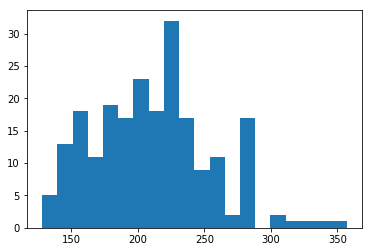

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(life,bins=20);

In [9]:
#寿命の半分までを抽出 -> 正常とみなす
quarter_list = []
for y in life:
    quarter_list.append(int(y/2))
print(quarter_list)

[111, 82, 75, 79, 178, 112, 84, 138, 90, 114, 105, 121, 105, 73, 89, 86, 114, 98, 83, 77, 102, 101, 106, 95, 140, 105, 89, 139, 114, 100, 141, 96, 143, 143, 94, 73, 88, 143, 80, 93, 100, 120, 104, 116, 121, 138, 113, 113, 142, 111, 91, 106, 129, 124, 73, 81, 75, 73, 84, 150, 114, 119, 127, 77, 104, 95, 72, 102, 85, 87, 112, 117, 124, 96, 93, 64, 87, 114, 112, 142, 99, 111, 115, 103, 123, 102, 88, 67, 112, 95, 99, 103, 111, 104, 117, 169, 78, 103, 131, 106, 113, 111, 121, 89, 74, 94, 100, 115, 80, 138, 113, 113, 80, 98, 130, 116, 106, 94, 121, 85, 76, 118, 127, 98, 122, 120, 81, 79, 73, 71, 131, 99, 75, 86, 94, 116, 118, 90, 105, 105, 138, 107, 74, 136, 94, 115, 161, 132, 96, 87, 158, 106, 138, 85, 110, 114, 101, 83, 87, 73, 92, 101, 88, 105, 80, 114, 88, 126, 109, 151, 129, 111, 95, 89, 139, 98, 109, 127, 111, 100, 80, 110, 112, 80, 99, 118, 99, 123, 121, 76, 127, 88, 111, 123, 142, 113, 78, 68, 96, 91, 100, 118, 112, 87, 67, 77, 139, 99, 126, 116, 105, 138, 131, 75, 78, 95, 143, 66]


In [11]:
import random
train_unit = random.sample(range(1,total_unit), 150)

list =[]
for i in train_unit:
    list.append(str(i))
print(list)

['42', '149', '75', '90', '22', '46', '14', '167', '112', '50', '77', '39', '158', '82', '193', '180', '187', '217', '19', '148', '101', '181', '32', '53', '203', '114', '110', '51', '155', '197', '23', '144', '147', '73', '139', '38', '120', '20', '211', '96', '30', '74', '183', '140', '41', '123', '100', '107', '134', '161', '169', '104', '117', '163', '25', '109', '1', '202', '160', '204', '6', '106', '157', '194', '2', '206', '111', '133', '173', '86', '138', '145', '176', '179', '214', '127', '190', '121', '76', '207', '15', '70', '79', '122', '84', '35', '135', '174', '36', '126', '95', '18', '58', '178', '4', '116', '125', '185', '60', '130', '80', '27', '29', '141', '208', '210', '119', '113', '94', '124', '137', '129', '16', '31', '142', '205', '57', '102', '81', '162', '150', '188', '62', '131', '209', '159', '85', '191', '98', '99', '52', '65', '171', '5', '215', '196', '56', '170', '213', '165', '11', '64', '7', '49', '63', '182', '108', '12', '192', '92']


In [12]:
df_selected = df[df["UnitNum"].isin(list)]
df_selected

,UnitNum,time,ope1,ope2,ope3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.00,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.00,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.00,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.00,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.00,10.99,6.4025
5,1,6,20.0032,0.7017,0.0,491.19,607.37,1480.46,1258.90,9.35,...,315.36,2388.05,8053.17,9.2276,0.02,364,2324,100.00,24.44,14.7019
6,1,7,41.9998,0.8400,40.0,445.00,549.57,1354.43,1131.44,3.91,...,130.16,2387.88,8082.01,9.3753,0.02,331,2212,100.00,10.53,6.4254
7,1,8,0.0011,0.0000,100.0,518.67,642.08,1589.55,1407.59,14.62,...,521.74,2388.03,8133.29,8.4339,0.03,391,2388,100.00,38.98,23.2337
8,1,9,0.0011,0.0020,100.0,518.67,642.70,1586.18,1399.01,14.62,...,521.72,2388.08,8132.72,8.3922,0.03,392,2388,100.00,38.99,23.2412
9,1,10,42.0066,0.8400,40.0,445.00,549.83,1353.19,1125.09,3.91,...,130.32,2387.91,8085.94,9.3667,0.02,330,2212,100.00,10.75,6.4268


In [13]:
train_df = pd.DataFrame()
for x in list:
    tmp_df = df_selected[df_selected["UnitNum"] == x]
    quarter = quarter_list[int(x) - 1]
    #print(quarter)
    train_df = train_df.append(tmp_df[tmp_df["time"] < quarter])
    #df[df["UnitNum"] == x]

In [14]:
train_df.head(10)

,UnitNum,time,ope1,ope2,ope3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
8618,42,1,42.0000,0.8400,40.0,445.00,549.50,1335.70,1125.79,3.91,...,130.67,2387.98,8087.11,9.3438,0.02,333,2212,100.0,10.46,6.4924
8619,42,2,41.9990,0.8400,40.0,445.00,549.78,1353.12,1121.86,3.91,...,130.84,2388.10,8087.15,9.3582,0.02,331,2212,100.0,10.66,6.2754
8620,42,3,34.9994,0.8400,60.0,449.44,555.30,1355.74,1115.33,5.48,...,183.31,2388.09,8072.98,9.2818,0.02,332,2223,100.0,14.97,8.9828
8621,42,4,42.0017,0.8400,40.0,445.00,549.35,1349.56,1116.27,3.91,...,130.59,2388.12,8083.68,9.3356,0.02,329,2212,100.0,10.85,6.4604
8622,42,5,42.0000,0.8402,40.0,445.00,549.16,1349.95,1117.53,3.91,...,130.57,2388.09,8094.59,9.3319,0.02,331,2212,100.0,10.56,6.3603
8623,42,6,42.0058,0.8415,40.0,445.00,549.25,1355.85,1119.24,3.91,...,130.92,2388.09,8090.81,9.3595,0.02,330,2212,100.0,10.58,6.3355
8624,42,7,0.0013,0.0000,100.0,518.67,641.94,1589.25,1403.73,14.62,...,521.79,2388.08,8140.93,8.3972,0.03,392,2388,100.0,38.87,23.3174
8625,42,8,10.0061,0.2516,20.0,489.05,605.29,1503.65,1305.89,10.52,...,372.19,2388.06,8140.11,8.6795,0.03,370,2319,100.0,28.78,17.1265
8626,42,9,10.0069,0.2500,20.0,489.05,604.35,1502.83,1302.42,10.52,...,372.29,2388.06,8133.81,8.6479,0.03,368,2319,100.0,28.52,17.1607
8627,42,10,42.0009,0.8400,40.0,445.00,548.83,1351.16,1124.92,3.91,...,130.86,2388.08,8087.29,9.3344,0.02,330,2212,100.0,10.73,6.4841


In [15]:
train_df.to_csv("../PHM2008/train_df.csv",index=None)